In [1]:
import numpy as np
from ODE_FixedStep import FixedStep
from ODE_MultipleStep import MultipleStep
from numba import njit
import plotter


In [2]:
def solver(a, b, n, y0, f, F):
    plt = plotter.Plotter2D()
    one_step = FixedStep(f, y0, a, b, n)
    mult_step = MultipleStep(f, a, b, y0, hmax=2.0, max_it=10000, tol=1e-3)
    fixed_step_methods = [
        "Explicit Euler",
        "Implicit Euler",
        "Central Difference",
        # "Improved Euler",
        # "Modified Euler",
        # "Trapezoidal",
        # "Simpson",
        "Runge-Kutta-3",
        "Runge-Kutta-4",
        # "Runge-Kutta-5",
    ]
    # abbr = ["EE", "Impl. E", "IE",
    # #"CE",
    # "ME", "TZ", "S", "RK3", "RK4", "RK5"]
    abbr = ["Expl. Euler", "Impl. Euler", "Central Diff.", "RK-3", "RK-4"]
    results = []
    for method in fixed_step_methods:
        x, y = one_step.apply(method)
        label = abbr[fixed_step_methods.index(method)]
        results.append((x, y, label))

    # (
    #     x,
    #     y,
    # ) = mult_step.apply("Dormand-Prince")
    # results.append((x, y, "DP"))

    plt.plot_approximations(results, F)


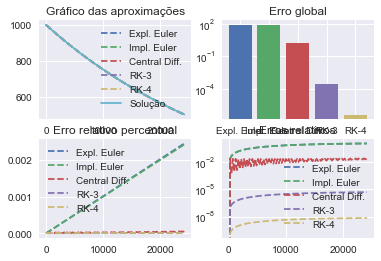

In [3]:
k = -2.867e-5  # Coeficiente de decaimento


@njit
def f(t, p):  # Função de decaimento
    return k * p

y0 = 1000
solution = lambda t: y0 * np.e ** (k * t)  # Solução analítica.
xn = 24180  # Quantidade total de anos
solver(a=0, b=xn, n=100, y0=y0, f=f, F=solution)


# Problemas Simples


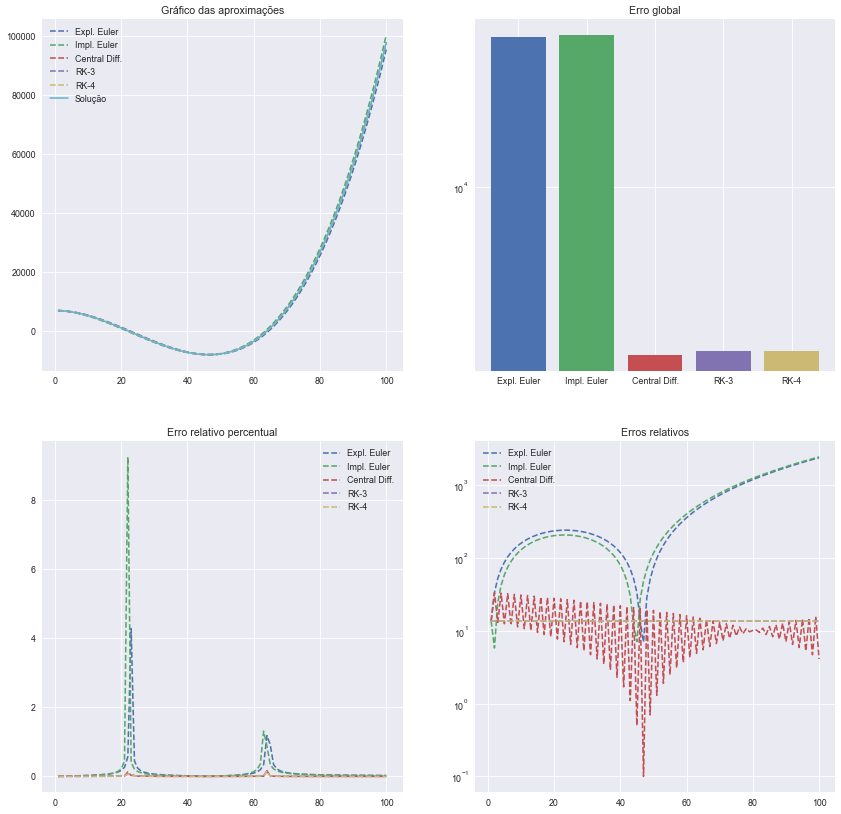

In [4]:
y0 = 7000
@njit
def f(x, y):
    return 0.9 * x**2 - 42 * x + 7

solution = lambda x: 0.3 * x**3 - 21 * x**2 + 7 * x + y0
solver(a=1, b=100, n=100, y0=y0, f=f, F=solution)


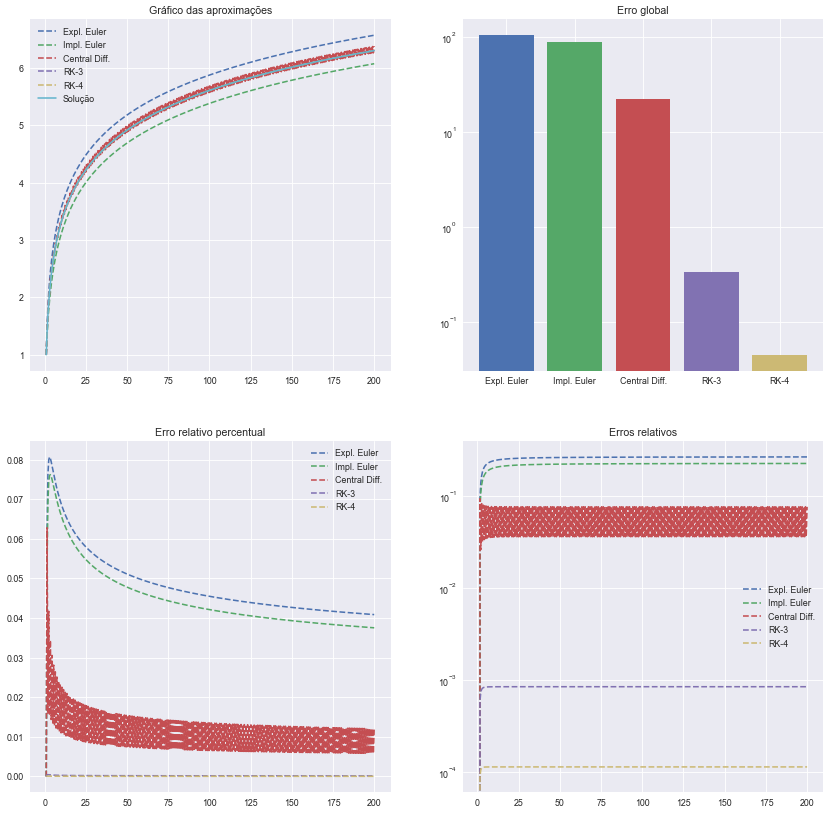

In [5]:
@njit
def f(x, y):
    return 1 / x


solution = lambda x: np.log(x) + 1
solver(a=1, b=200, n=400, y0=1, f=f, F=solution)


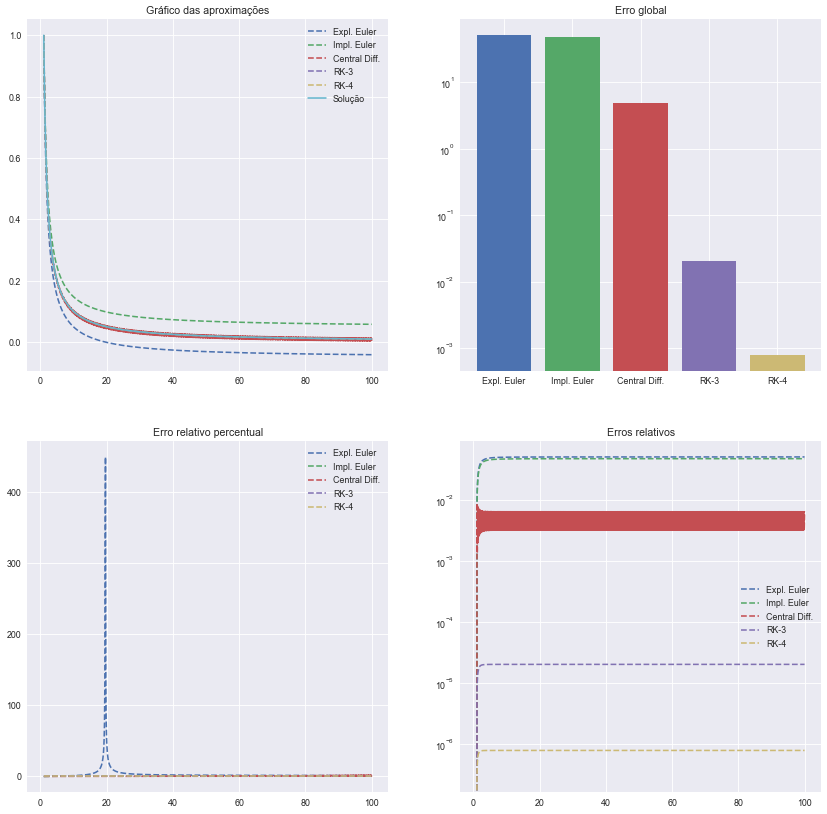

In [6]:
@njit
def f(x, y):
    return -1 / (x * x)


y0 = 1
solution = lambda x: 1 / x
solver(a=1, b=100, n=1000, y0=y0, f=f, F=solution)


# Problemas mais complexos


Problema 1 - página 122 - Equações Diferenciais por Dennis Zill


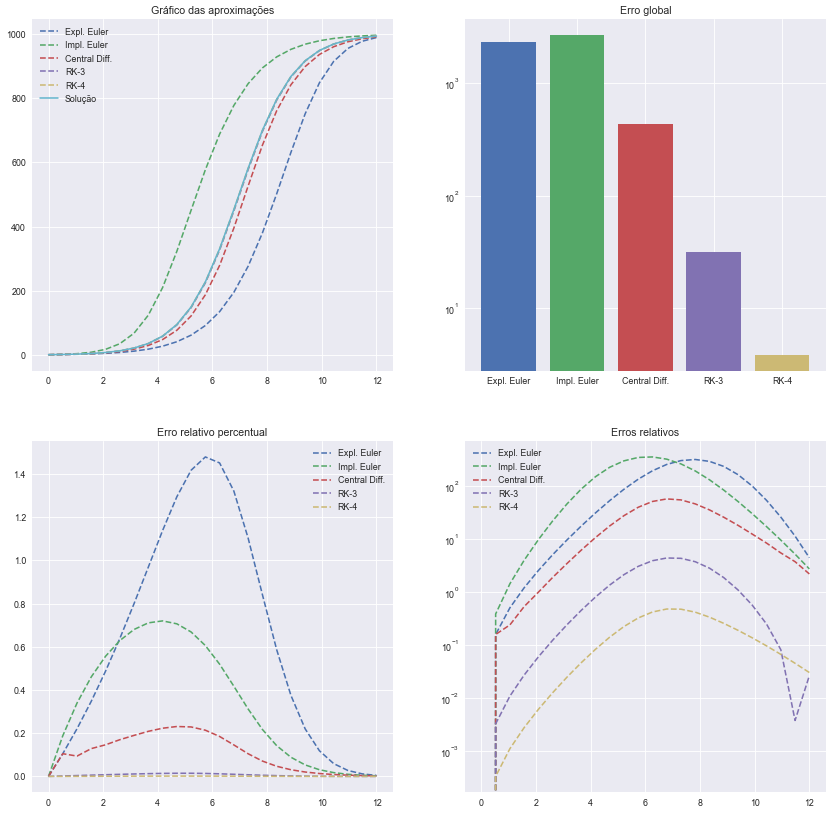

In [18]:
k = 9.906e-4  # Coeficiente de decaimento
@njit
def f(t, x):
    return k * x * (1000 - x)

y0 = 1  # Quantidade inicial
solution = lambda t: 1000 / (1 + 999 * np.e ** (-1000 * k * t))
xn = 12  # Quantidade total de anos
solver(a=0, b=xn, n=24, y0=y0, f=f, F=solution)


Problema 2, página 106 do livro Equações Diferenciais por Dennis Zill.


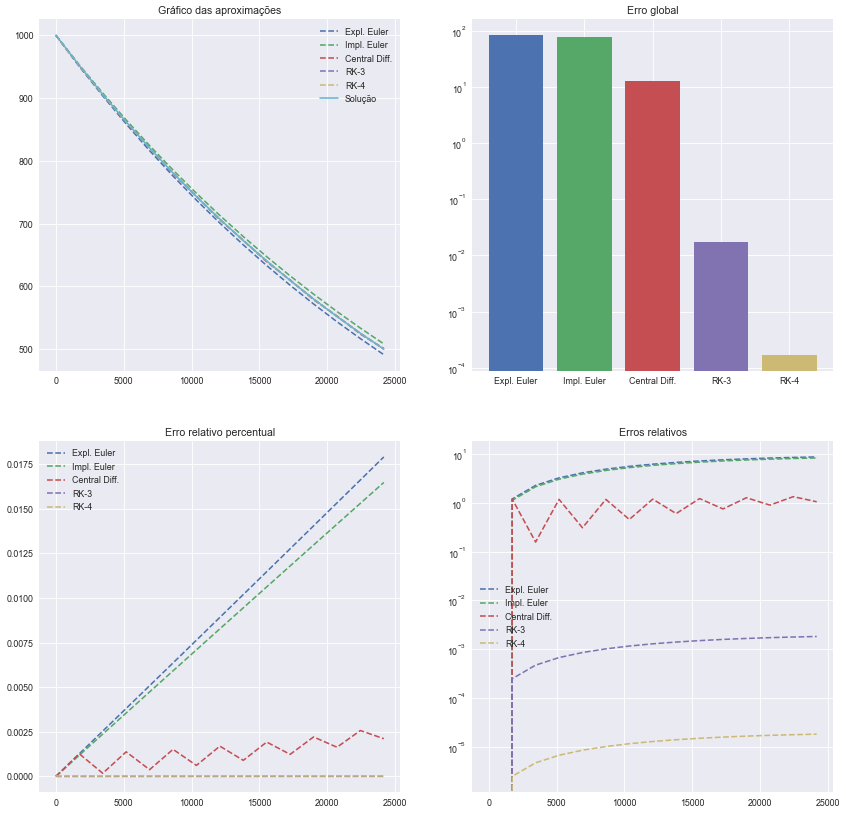

In [8]:
k = -2.867e-5  # Coeficiente de decaimento
@njit
def f(t, p):
    return k * p  # Função de decaimento

y0 = 1000  # Quantidade inicial
solution = lambda t: y0 * np.e ** (k * t)  # Solução analítica.
xn = 24180  # Quantidade total de anos
solver(a=0, b=xn, n=15, y0=y0, f=f, F=solution)


A água atinge o estado sólido — isto é, gelo — quando sua temperatura é igual ou inferior a 0 °C em condições ideais. Supõe-se, em seguida, que uma pessoa
gostaria de saber quanto tempo ela deveria aguardar para obter gelo após colocar dois recipientes de água em temperatura de 25 °C em seu congelador à -5 °C, com
1 e 2 litros de água cada.

Segundo a Lei do Resfriamento de Newton, a variação de perda de calor com o tempo de um corpo é proporcional à diferença de temperatura entre o ambiente e o
corpo, multiplicada por um valor k. Ou seja, $\frac{dT}{dt} = k(T-T_0)$.

Considerando a temperatura da água uniformemente distribuída no recipiente a temperatura dos recipientes contendo 1 e 2 litros após dez minutos eram de 12 °C e
15 °C, respectivamente, qual o tempo mínimo necessário para que a água em cada recipiente atingisse o estado sólido?


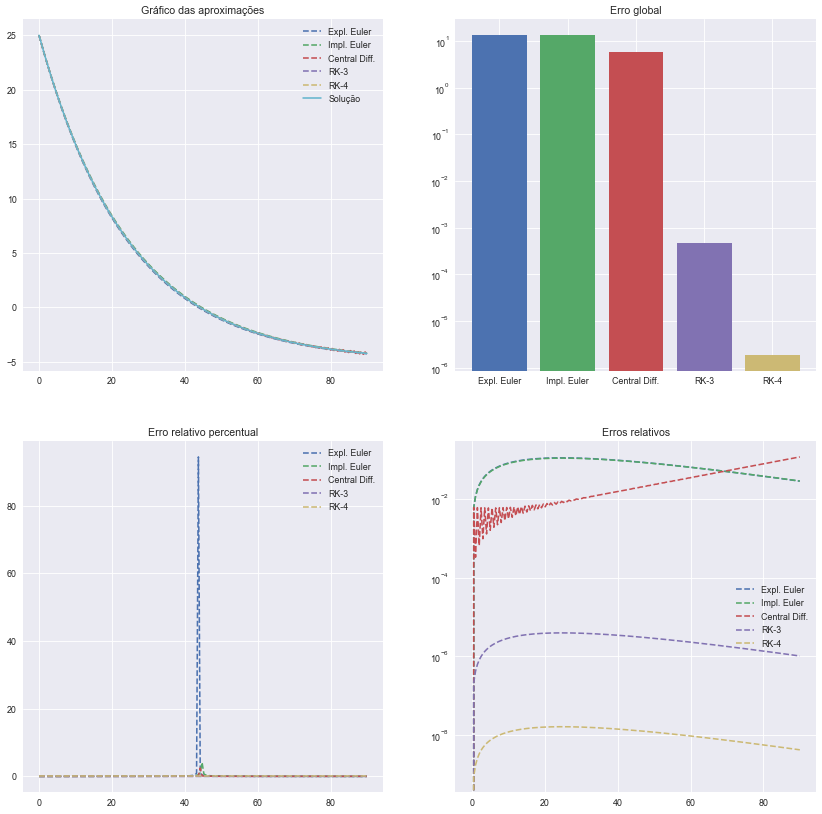

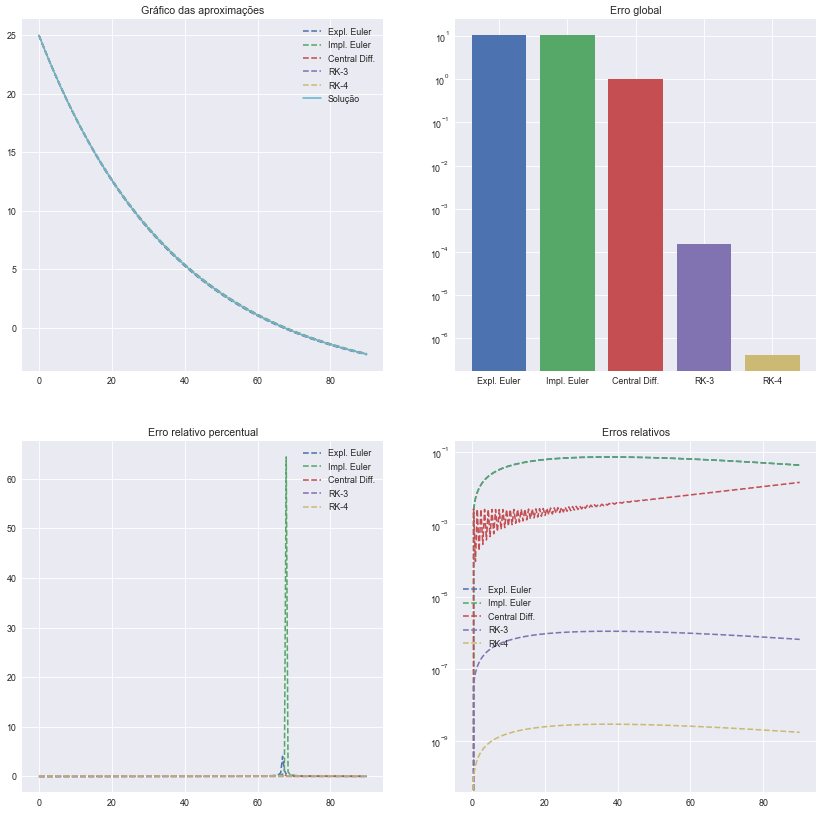

In [9]:
T0 = 25.0
Te = -5.0
i = 10
Ti = [15.0, 18.0]
for t_i in Ti:
    k = (1 / i) * np.log((t_i - Te) / (T0 - Te))
    
    @njit
    def f(t, T):
        return k * (T - Te)
    @njit
    def solution(t):
        return Te + (T0 - Te) * np.e ** (k * t)
    xn = 90
    solver(a=0, b=xn, n=180, y0=T0, f=f, F=solution)


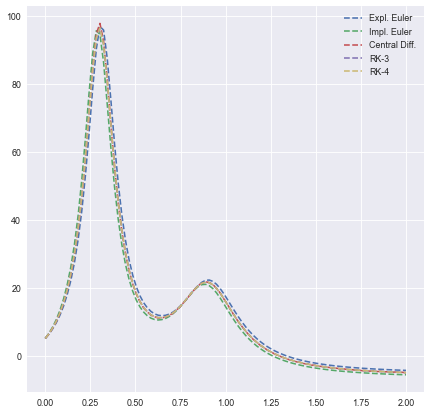

In [10]:
y0 = 5.1765
@njit
def f(x, y):
    return  -2.0 * (x - 0.3) / ((x - 0.3) ** 2 + 0.01) ** 2 - 2.0 * (x - 0.9) / ((x - 0.9) ** 2 + 0.04) ** 2
# solution = lambda x: (1 / ((x - 0.3) **2 + 0.01)) + (1 / ((x-0.9)**2 + 0.04)) - y0
solution = None
solver(a=0, b=2, n=100, y0=y0, f=f, F=solution)
